In [4]:
import pandas as pd

data = pd.read_csv("..\\data\\all.csv", index_col=0)

display(data)

,ID,Annotation,Organism,Sequence
0,A0A2K1J0T4,Histone H3,Physcomitrium patens,MSVCEGGSVRMARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGV...
1,A0A2K1IM99,Histone H3,Physcomitrium patens,MARTKQTARKSTGGKAPRKQLATKKVHPHHRRIKKPHRYRPGTVAL...
2,A0A2K1J132,Histone H3,Physcomitrium patens,MSALAFTMARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKP...
3,A9RDR6,Histone H3,Physcomitrium patens,MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGT...
4,A9RIZ2,Histone H3,Physcomitrium patens,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...
...,...,...,...,...
0,Q71V89,Histone H3.3,Gossypium hirsutum,MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGT...
1,A0A1U8K8D8,Histone H3,Gossypium hirsutum,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRFRPGT...
2,A0A1U8K381,Histone H3,Gossypium hirsutum,MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGT...
3,A0A1U8NWL7,Histone H3,Gossypium hirsutum,MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGT...


In [13]:
def export_fasta(df, filename):
    with open(filename, "w") as f:
        for _, row in df.iterrows():
            id = row['ID'].replace(' ','_')
            anno = row['Annotation'].replace(' ','_')
            orga = row['Organism'].replace(' ','_')
            seq = row['Sequence']
            f.write(f">{id}_{anno}_{orga}\n{row['Sequence']}\n")

export_fasta(data, "all.fasta")

In [18]:
import subprocess

def call_clustalo_omega(input_fasta, output_fasta):

    command = ["clustalo", "-i", input_fasta, "-o", output_fasta, "--outfmt", "fasta", '--force']
    try:
        res = subprocess.run(command, check=True)
    except Exception as E:
        display(E)
    
    print(f"return code = {res.returncode}")

call_clustalo_omega("all.fasta", 'all_alignment_result.fasta')

return code = 0


In [1]:
from plot import plot

using defual black color for y_labels
num seq = 98
Current y-tick spacing: 0.68


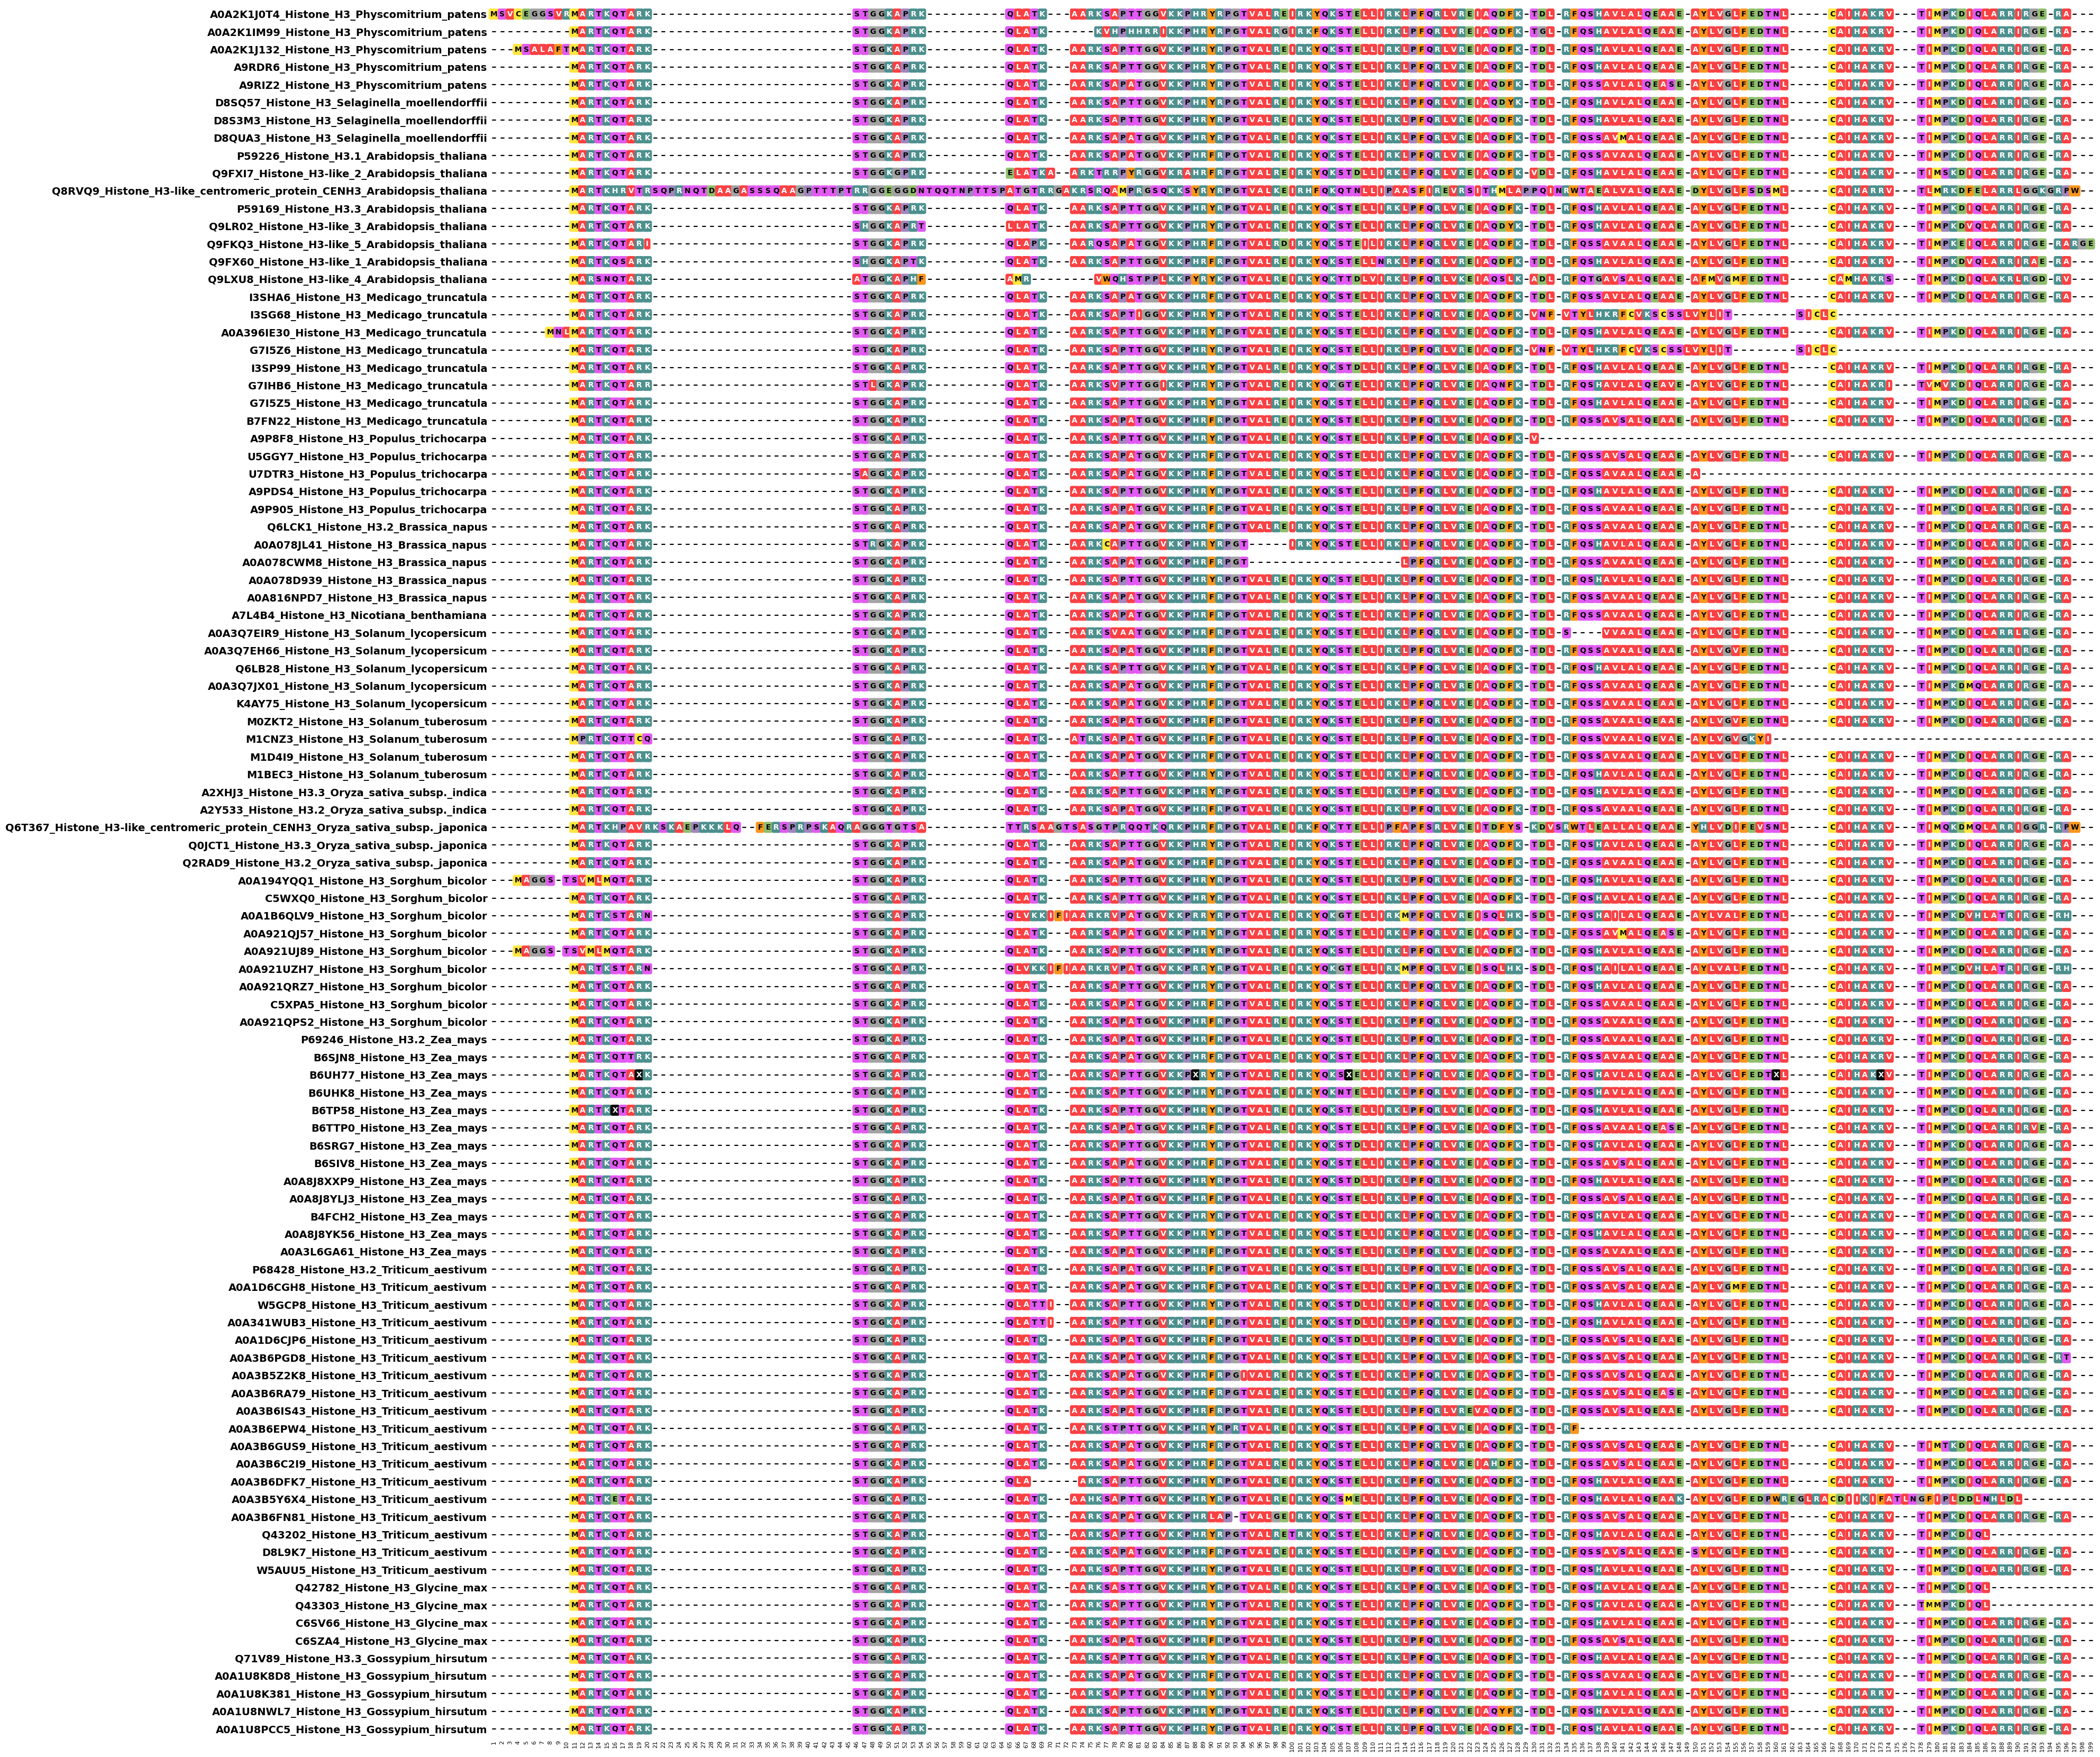

In [4]:
plot(input_file_path='all_alignment_result.fasta', output_file_path='all.pdf', y_zip=0.68)